In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

In [ ]:
a_df = pd.read_csv("Answer.csv")

In [ ]:
print(a_df.shape)
print(a_df.describe())
print(a_df.info())
print(a_df.isnull().sum())

(236898, 4)
            SurveyID         UserID     QuestionID
count  236898.000000  236898.000000  236898.000000
mean     2016.572297    2514.516619      48.655898
std         1.421134    1099.462747      36.126215
min      2014.000000       1.000000       1.000000
25%      2016.000000    1691.000000      15.000000
50%      2016.000000    2652.000000      48.000000
75%      2017.000000    3439.000000      80.000000
max      2019.000000    4218.000000     118.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236898 entries, 0 to 236897
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   AnswerText  236898 non-null  object
 1   SurveyID    236898 non-null  int64 
 2   UserID      236898 non-null  int64 
 3   QuestionID  236898 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.2+ MB
None
AnswerText    0
SurveyID      0
UserID        0
QuestionID    0
dtype: int64


Data Cleaning & Preprocessing

In [ ]:
a_df

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1,44,2014,2,1
2,32,2014,3,1
3,31,2014,4,1
4,31,2014,5,1
...,...,...,...,...
236893,Other,2016,2689,117
236894,Support,2016,2690,117
236895,Back-end Developer,2016,2691,117
236896,DevOps/SysAdmin,2016,2692,117


<ipython-input-17-aff162406568>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(a_df.corr())


<Axes: >

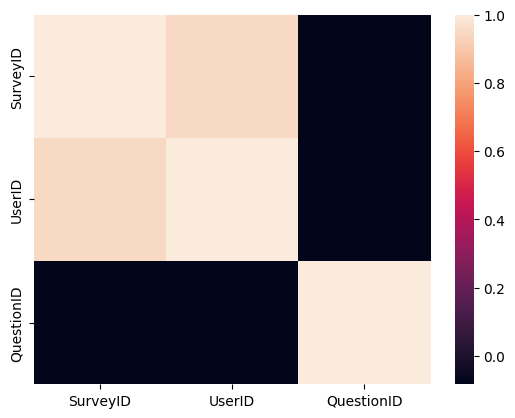

In [ ]:
sns.heatmap(a_df.corr())

In [ ]:
temp = a_df.sort_values(['UserID','QuestionID'])
f_one = temp[temp['SurveyID']==2014]
f_one

,AnswerText,SurveyID,UserID,QuestionID
0,37,2014,1,1
1260,Female,2014,1,2
2520,United States,2014,1,3
3780,Illinois,2014,1,4
5040,-1,2014,1,5
...,...,...,...,...
27719,Some of them,2014,1260,99
28979,No,2014,1260,100
30239,Maybe,2014,1260,101
31499,Yes,2014,1260,102


In [ ]:
max(f_one['UserID'])

1260

In [ ]:
f_one.shape

(32760, 4)

In [ ]:

new = f_one
new = new.drop(['SurveyID','UserID','QuestionID'],axis=1)
new = new.transpose()
new = pd.DataFrame(new.values.reshape(-1,26))
new

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,37,Female,United States,Illinois,-1,No,1,Jun-25,1,Yes,...,Not sure,No,Yes,Somewhat easy,No,Some of them,Yes,Maybe,No,-1
1,44,Male,United States,Indiana,-1,No,0,More than 1000,0,Don't know,...,No,Don't know,Don't know,Don't know,Maybe,No,No,No,No,-1
2,32,Male,Canada,-1,-1,No,0,Jun-25,1,No,...,No,No,No,Somewhat difficult,No,Yes,Yes,Yes,No,-1
3,31,Male,United Kingdom,-1,-1,Yes,1,26-100,1,No,...,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe,Yes,-1
4,31,Male,United States,Texas,-1,No,0,100-500,1,Yes,...,No,Don't know,Don't know,Don't know,No,Some of them,Yes,Yes,No,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,Male,United States,Illinois,0,Yes,1,26-100,1,Yes,...,Yes,No,No,Somewhat difficult,No,Some of them,Yes,No,No,-1
1256,34,Male,United States,California,0,Yes,1,More than 1000,1,Yes,...,Yes,No,No,Somewhat difficult,Yes,No,No,No,No,-1
1257,46,Female,United States,North Carolina,0,No,0,100-500,1,No,...,Yes,No,No,Don't know,Yes,No,No,No,No,-1
1258,25,Male,United States,Illinois,0,Yes,1,26-100,0,Yes,...,Yes,No,No,Don't know,Maybe,Some of them,No,No,No,-1


In [ ]:
new.columns = ['Age',"Gender","Country","state","self_employed","family_history",	"treatment","work_interfere","no_employees","remote_work","tech_company",	"benefits",	"care_options	wellness_program",	"seek_help"	,"anonymity"	,"leave",	"mental_health_consequence",	"phys_health_consequence"	,"coworkers",	"supervisor",	"mental_health_interview",	"phys_health_interview",	"mental_vs_physical",	"obs_consequence"	,"comments","extra"]

In [ ]:
new = new.drop(['state','work_interfere', 'coworkers', 'mental_health_interview', 'obs_consequence','extra'],axis=1)

In [ ]:
gender = new['Gender'].unique()
#Get rid of unnecessary values
stk_list = ['A little about you','Trans-female','Genderqueer', 'p','queer','A little about you','p','Androgyne','Neuter','Agender','fluid','Enby', 'non-binary','Nah','All','Genderqueer''Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means''Trans-female','queer/she/they','Trans woman','Female (trans)','Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means']
new = new[~new['Gender'].isin(stk_list)]
print(new['Gender'].unique())

['Female' 'Male']


In [ ]:
new

,Age,Gender,Country,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,37,Female,United States,-1,No,1,1,Yes,Yes,No,No,Yes,Often,No,Not sure,No,Somewhat easy,Some of them,Yes,No
1,44,Male,United States,-1,No,0,0,Don't know,Don't know,No,No,Don't know,Rarely,No,No,Don't know,Don't know,No,No,No
2,32,Male,Canada,-1,No,0,1,No,Don't know,Yes,No,No,Rarely,No,No,No,Somewhat difficult,Yes,Yes,No
3,31,Male,United Kingdom,-1,Yes,1,1,No,No,Maybe,Yes,No,Often,No,Yes,No,Somewhat difficult,Some of them,No,Yes
4,31,Male,United States,-1,No,0,1,Yes,Don't know,Yes,No,Don't know,Never,Yes,No,Don't know,Don't know,Some of them,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,Male,United States,0,Yes,1,1,Yes,Yes,No,No,Yes,Often,Yes,Yes,No,Somewhat difficult,Some of them,Yes,No
1256,34,Male,United States,0,Yes,1,1,Yes,Don't know,No,Yes,No,Sometimes,No,Yes,No,Somewhat difficult,No,No,No
1257,46,Female,United States,0,No,0,1,No,Don't know,No,No,No,-1,Yes,Yes,No,Don't know,No,No,No
1258,25,Male,United States,0,Yes,1,0,Yes,Yes,No,No,Don't know,Sometimes,No,Yes,No,Don't know,Some of them,No,No


In [ ]:
# # Encoding for categorical features

# # Bth column
new.replace(to_replace="Male", value=1, inplace=True)
new.replace(to_replace="Female", value=0, inplace=True)
new.replace(to_replace="Trans-female", value=-1, inplace=True)
# new.replace(to_replace = ['Male-ish','something kinda male?','Guy (-ish) ^_^','male leaning androgynous','ostensibly male, unsure what that really means'],value=0.5,inplace=True)
# new.replace(to_replace = ['Trans-female','queer/she/they','Trans woman','Female (trans)'],value=-0.5,inplace=True)
# new.replace(to_replace = ['queer','A little about you','p','Androgyne','Neuter','Agender','fluid','Enby', 'non-binary','Nah','All','Genderqueer'],value=-1,inplace=True)

# # Fth column
new.replace(to_replace="Yes", value=2, inplace=True)
new.replace(to_replace="No", value=-2, inplace=True)


# # ? column
new.replace(to_replace="Maybe", value=0, inplace=True)

# # Cth column
# new.replace(to_replace="United States", value=1, inplace=True)
# new.replace(to_replace=['Canada', 'United Kingdom', 'Bulgaria', 'France', 'Portugal',
#        'Netherlands', 'Switzerland', 'Poland', 'Australia', 'Germany',
#        'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica', 'Austria',
#        'Ireland', 'India', 'South Africa', 'Italy', 'Sweden', 'Colombia',
#        'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Zimbabwe', 'Spain',
#        'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
#        'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
#        'Thailand', 'Denmark', 'Bahamas, The', 'Greece', 'Moldova',
#        'Georgia', 'China', 'Czech Republic', 'Philippines'],value=2,inplace=True)

# # Oth column
new.replace(to_replace='Often',value=-2,inplace=True)
new.replace(to_replace='Rarely',value=-1,inplace=True)
new.replace(to_replace='Never',value=1,inplace=True)
new.replace(to_replace='Sometimes',value=2,inplace=True)


# # Tth column
new.replace(to_replace="Don't know", value=-3, inplace=True)
new.replace(to_replace='Somewhat easy',value=5,inplace=True)
new.replace(to_replace='Somewhat difficult',value=6,inplace=True)
new.replace(to_replace='Very difficult',value=7,inplace=True)
new.replace(to_replace='Very easy',value=4,inplace=True)


# # Vth column
new.replace(to_replace='Some of them',value=0,inplace=True)
new.replace(to_replace='No',value=-9,inplace=True)
new.replace(to_replace='Yes',value=9,inplace=True)



# # Wth column
# new.replace(to_replace='Yes',value=10,inplace=True)
# new.replace(to_replace='No',value=-10,inplace=True)
new.replace(to_replace='Some of them',value=13,inplace=True)

# # Yth column
# new.replace(to_replace='Yes',value=11,inplace=True)
# new.replace(to_replace='No',value=-11,inplace=True)

# # Qth column
new.replace(to_replace='Not sure',value=16,inplace=True)



# new

In [ ]:


string_cols = new.select_dtypes(include=['object']).columns
print(string_cols.tolist())

# Convert some of the columns into integers (where some columns have only integers but stored as string/object type)
for i in range(2,6):
    new[string_cols.tolist()[i]] = new[string_cols.tolist()[i]].astype(int)

new['Gender']=new['Gender'].astype(int)


['Age', 'Country', 'self_employed', 'treatment', 'no_employees', 'anonymity']


In [ ]:
new.drop('Country',axis=1)

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,37,0,-1,-2,1,1,2,2,-2,-2,2,-2,-2,16,-2,5,0,2,-2
1,44,1,-1,-2,0,0,-3,-3,-2,-2,-3,-1,-2,-2,-3,-3,-2,-2,-2
2,32,1,-1,-2,0,1,-2,-3,2,-2,-2,-1,-2,-2,-2,6,2,2,-2
3,31,1,-1,2,1,1,-2,-2,0,2,-2,-2,-2,2,-2,6,0,-2,2
4,31,1,-1,-2,0,1,2,-3,2,-2,-3,1,2,-2,-3,-3,0,2,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,32,1,0,2,1,1,2,2,-2,-2,2,-2,2,2,-2,6,0,2,-2
1256,34,1,0,2,1,1,2,-3,-2,2,-2,2,-2,2,-2,6,-2,-2,-2
1257,46,0,0,-2,0,1,-2,-3,-2,-2,-2,-1,2,2,-2,-3,-2,-2,-2
1258,25,1,0,2,1,0,2,2,-2,-2,-3,2,-2,2,-2,-3,0,-2,-2


In [ ]:
new["anonymity"] = pd.to_numeric(new["anonymity"], errors='coerce').astype(int)
new.shape

(1238, 20)

In [ ]:
print(len(new.select_dtypes(include=['object']).columns))
print()
new.select_dtypes(include=['object'])
new["Age"] = pd.to_numeric(new["Age"], errors='coerce').astype(int)


2



In [ ]:
new = new.drop('Country',axis=1)

In [ ]:
gender = new['Gender'].unique()
print(gender)
#Taking care of 'Gender' column
stk_list = ['A little about you', 'p',
            'Male-ish','something kinda male?',
            'Guy (-ish) ^_^','male leaning androgynous',
            'ostensibly male, unsure what that really means',
            'Trans-female','queer/she/they','Trans woman','Female (trans)'
            'queer','A little about you','p','Androgyne','Neuter','Agender','fluid'
            ,'Enby', 'non-binary','Nah','All','Genderqueer','anonymity']

new = new[~new['Gender'].isin(stk_list)]
print(new['Gender'].unique())

[0 1]
[0 1]


In [ ]:
new

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,0.469388,0,0,0,1,1,2,2,0,0,2,0,0,2,1,2,1,2,0
1,0.612245,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.367347,1,0,0,0,1,1,0,2,0,1,1,0,0,1,3,2,2,0
3,0.346939,1,0,1,1,1,1,1,1,2,1,0,0,1,1,3,1,0,1
4,0.346939,1,0,0,0,1,2,0,2,0,0,2,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.367347,1,1,1,1,1,2,2,0,0,2,0,1,1,1,3,1,2,0
1256,0.408163,1,1,1,1,1,2,0,0,2,1,3,0,1,1,3,0,0,0
1257,0.653061,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0
1258,0.224490,1,1,1,1,0,2,2,0,0,0,3,0,1,1,0,1,0,0


In [ ]:
# Checking for Label Encoding

labelDict = {}
for feature in new:
    le = preprocessing.LabelEncoder()
    le.fit(new[feature])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    new[feature] = le.transform(new[feature])
    # Get labels
    labelKey = 'label_' + feature
    labelValue = [*le_name_mapping]
    labelDict[labelKey] =labelValue
for key, value in labelDict.items():
    print(key, value)

label_Age [0.0, 0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.1020408163265306, 0.12244897959183673, 0.14285714285714285, 0.16326530612244897, 0.18367346938775508, 0.2040816326530612, 0.22448979591836732, 0.24489795918367346, 0.26530612244897955, 0.2857142857142857, 0.3061224489795918, 0.32653061224489793, 0.3469387755102041, 0.36734693877551017, 0.3877551020408163, 0.4081632653061224, 0.42857142857142855, 0.44897959183673464, 0.4693877551020408, 0.4897959183673469, 0.5102040816326531, 0.5306122448979591, 0.5510204081632653, 0.5714285714285714, 0.5918367346938775, 0.6122448979591836, 0.6326530612244897, 0.6530612244897959, 0.673469387755102, 0.6938775510204082, 0.7142857142857142, 0.7346938775510203, 0.7551020408163265, 0.7755102040816326, 0.7959183673469387, 0.8163265306122448, 0.836734693877551, 0.8571428571428571, 0.8775510204081632, 0.8979591836734693, 0.9183673469387754, 0.9387755102040816, 0.9591836734693877, 0.9795918367346939, 0.99999999

In [ ]:
#Taking care and final checking of missing data
total = new.isnull().sum().sort_values(ascending=False)
percent = (new.isnull().sum()/new.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
print(missing_data)

                                Total  Percent
Age                                 0      0.0
seek_help                           0      0.0
mental_vs_physical                  0      0.0
phys_health_interview               0      0.0
supervisor                          0      0.0
phys_health_consequence             0      0.0
mental_health_consequence           0      0.0
leave                               0      0.0
anonymity                           0      0.0
care_options\twellness_program      0      0.0
Gender                              0      0.0
benefits                            0      0.0
tech_company                        0      0.0
remote_work                         0      0.0
no_employees                        0      0.0
treatment                           0      0.0
family_history                      0      0.0
self_employed                       0      0.0
comments                            0      0.0


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


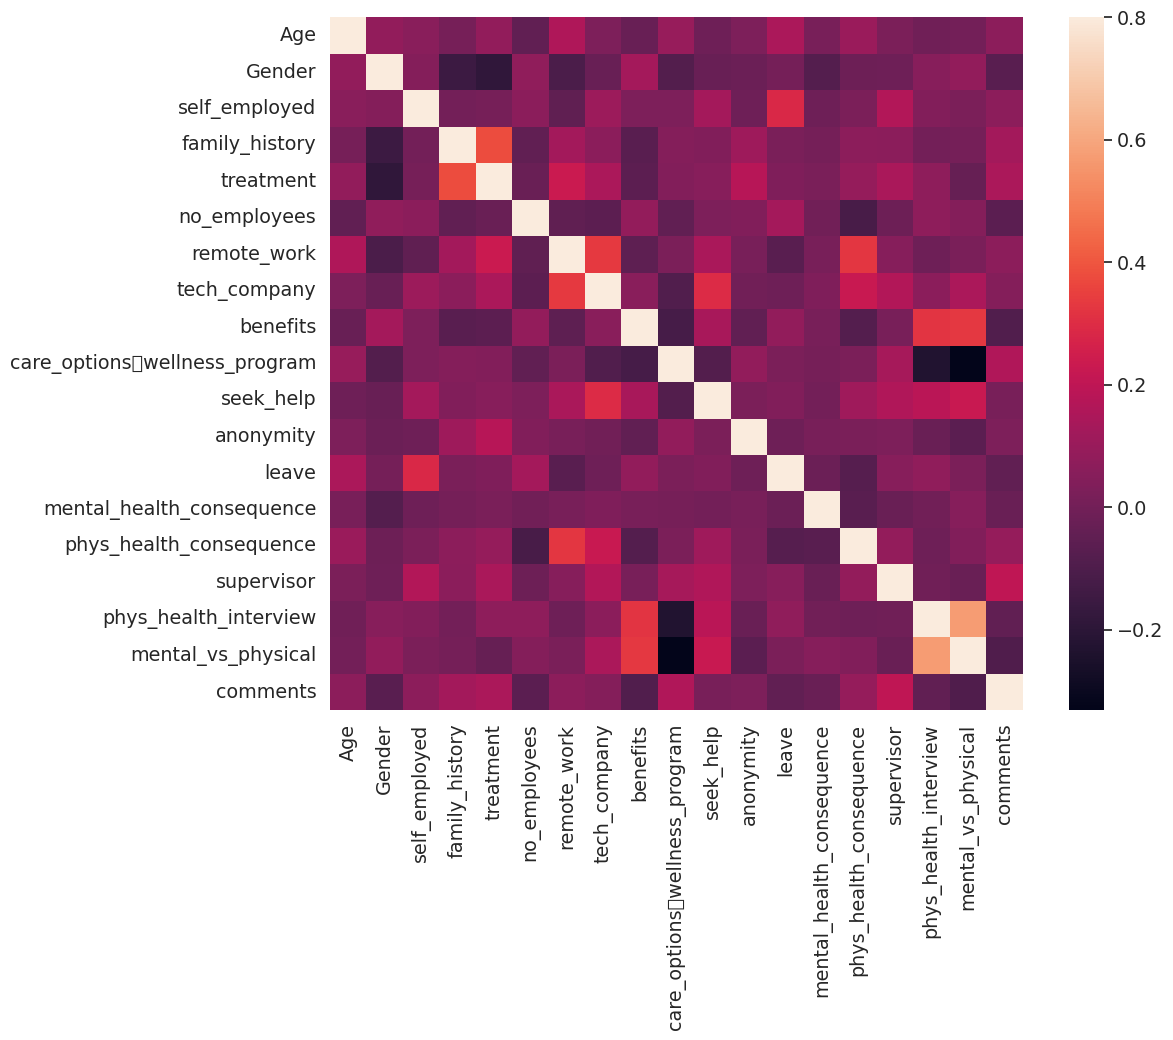

In [ ]:
#CORRELATION MATRIX
corrmat = new.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

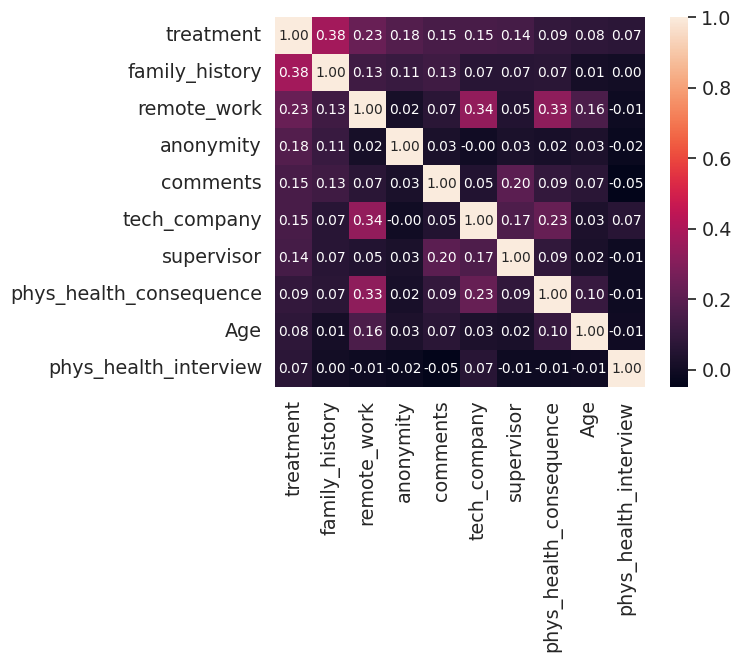

In [ ]:
k = 10
cols = corrmat.nlargest(k, 'treatment')['treatment'].index
cm = np.corrcoef(new[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<ipython-input-49-9159682c7efc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new["Age"], bins=24)


Text(0.5, 0, 'Age')

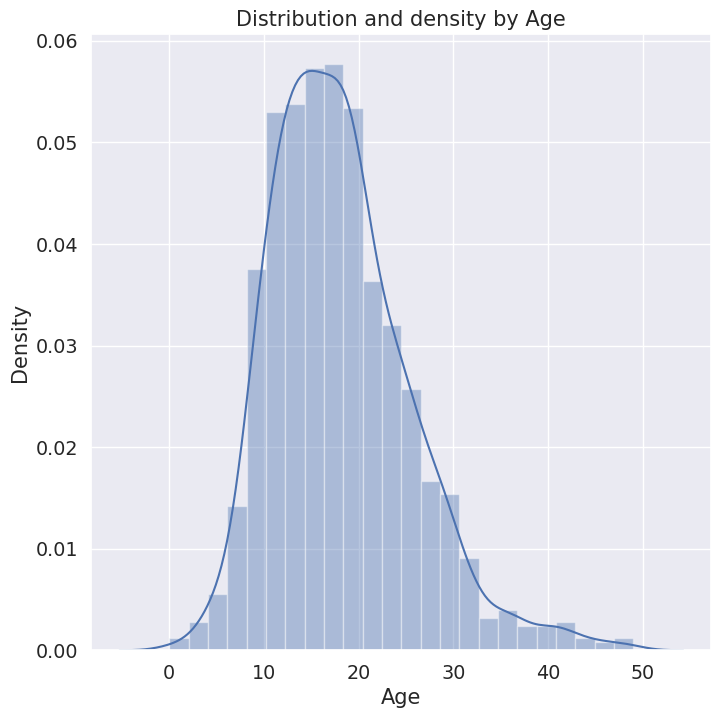

In [ ]:
plt.figure(figsize=(8,8))
sns.distplot(new["Age"], bins=24)
plt.title("Distribution and density by Age")
plt.xlabel("Age")

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


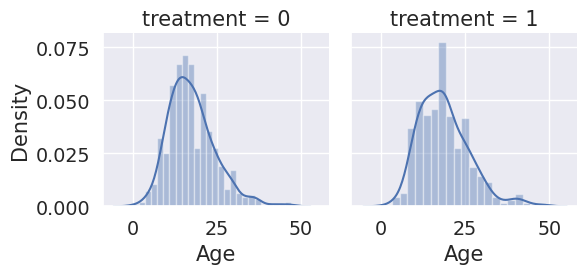

In [ ]:
j = sns.FacetGrid(new, col='treatment')
j = j.map(sns.distplot, "Age")

In [ ]:
scaler = MinMaxScaler()
new['Age'] = scaler.fit_transform(new[['Age']])
new

,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,care_options\twellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,supervisor,phys_health_interview,mental_vs_physical,comments
0,0.469388,0,0,0,1,1,2,2,0,0,2,0,0,2,1,2,1,2,0
1,0.612245,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.367347,1,0,0,0,1,1,0,2,0,1,1,0,0,1,3,2,2,0
3,0.346939,1,0,1,1,1,1,1,1,2,1,0,0,1,1,3,1,0,1
4,0.346939,1,0,0,0,1,2,0,2,0,0,2,1,0,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,0.367347,1,1,1,1,1,2,2,0,0,2,0,1,1,1,3,1,2,0
1256,0.408163,1,1,1,1,1,2,0,0,2,1,3,0,1,1,3,0,0,0
1257,0.653061,0,1,0,0,1,1,0,0,0,1,1,1,1,1,0,0,0,0
1258,0.224490,1,1,1,1,0,2,2,0,0,0,3,0,1,1,0,1,0,0


In [ ]:
# define X and y
feature_cols1 = ['Age', 'Gender', 'family_history', 'benefits', 'anonymity', 'leave']
X = new[feature_cols1]
y = new.treatment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)


In [ ]:
def accuracyscore(y_true, y_pred):
    true_positives = 0
    true_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negatives += 1

    accuracy = (true_positives + true_negatives) / len(y_pred)

    return accuracy


def recallscore(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    recall = true_positives / (true_positives + false_negatives)

    return recall


def f1_score(y_true, y_pred):
    true_positives = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)

    f1 = 2 * (precision * recall) / (precision + recall)

    return f1



def sensitivity_score(y_true, y_pred):
    true_positives = 0
    false_negatives = 0

    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positives += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negatives += 1

    sensitivity = true_positives / (true_positives + false_negatives)

    return sensitivity



# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define logistic regression function
def logistic_regression(X_train, y_train, X_test):
    # Initialize weights and bias
    n_features = X_train.shape[1]
    weights = np.zeros(n_features)
    bias = 0
    # Set learning rate and number of iterations
    learning_rate = 0.01
    n_iterations = 1000
    # Perform gradient descent
    for i in range(n_iterations):
        z = np.dot(X_train, weights) + bias
        y_predicted = sigmoid(z)
        dw = (1 / len(y_train)) * np.dot(X_train.T, (y_predicted - y_train))
        db = (1 / len(y_train)) * np.sum(y_predicted - y_train)
        weights -= learning_rate * dw
        bias -= learning_rate * db
    # Predict labels for test set
    y_predicted = sigmoid(np.dot(X_test, weights) + bias)
    # Return predicted labels
    return y_predicted



# Convert the dataset to a numpy array
new_array = new.values

# Split the dataset into training and testing sets
train_size = int(0.8 * len(new_array))
X_train, y_train = new_array[:train_size, :-1], new_array[:train_size, -1]
X_test, y_test = new_array[train_size:, :-1], new_array[train_size:, -1]

# Call the logistic regression function
y_predicted = logistic_regression(X_train, y_train, X_test)

# Round predicted probabilities to 0 or 1
y_predicted = np.round(y_predicted)

# Calculate accuracy
accuracy = np.sum(y_predicted == y_test) / len(y_test)

# Print accuracy
print("Accuracy:", accuracy*100)
# Calculate and print confusion matrix, recall, precision, F1 score
cm = confusion_matrix(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
print("Confusion Matrix:\n", cm)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 81.85483870967742
Confusion Matrix:
 [[202   1]
 [ 44   1]]
Recall: 0.022222222222222223
Precision: 0.5
F1 Score: 0.0425531914893617
